<a href="https://colab.research.google.com/github/lucatraverso/Mapa-de-ruido_Geopandas/blob/main/mapa_de_ruido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mapa de ruido de CABA

Vamos a jugar un poco con geopandas y el mapa de ruido disponible en la pagina del Gobierno de la Ciudad. Que informacion nos puede interesar?
- Distribucion de los limites segun comunas
- Comuna mas ruidosa.
- Comuna mas menos ruidosa
- Comuna 12
- Calles o avenidas mas ruidosas

In [1]:
!pip install geopandas

In [2]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!wget https://cdn.buenosaires.gob.ar/datosabiertos//datasets/mapa-del-ruido/mapa_de_ruido_diurno.csv

--2021-07-14 17:49:47--  https://cdn.buenosaires.gob.ar/datosabiertos//datasets/mapa-del-ruido/mapa_de_ruido_diurno.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72638475 (69M) [text/csv]
Saving to: ‘mapa_de_ruido_diurno.csv.1’

mapa_de_ruido_diurn 100%[===================>]  69.27M   255KB/s    in 4m 43s  

2021-07-14 17:54:33 (251 KB/s) - ‘mapa_de_ruido_diurno.csv.1’ saved [72638475/72638475]



In [4]:
mapa_ruido = gpd.read_file('mapa_de_ruido_diurno.csv')

In [5]:
mapa_ruido.columns
mapa_ruido.head(3)


,wkt,limite_inferior_rango_db,limite_superior_rango_db,comuna,leyenda,rango_db,color,periodo,geometry
0,MULTIPOLYGON (((-58.3714231269834 -34.57855223...,30.0,35.0,1,35 dBA o menos,30-35,169 255 115,Diurno,"MULTIPOLYGON (((-58.37142 -34.57855, -58.37150..."
1,MULTIPOLYGON (((-58.3714231269834 -34.57855223...,35.0,40.0,1,35-40 dBA,35-40,76 230 0,Diurno,"MULTIPOLYGON (((-58.37142 -34.57855, -58.37142..."
2,MULTIPOLYGON (((-58.3714231117057 -34.57856621...,40.0,45.0,1,40-45 dBA,40-45,38 115 0,Diurno,"MULTIPOLYGON (((-58.37142 -34.57857, -58.37142..."


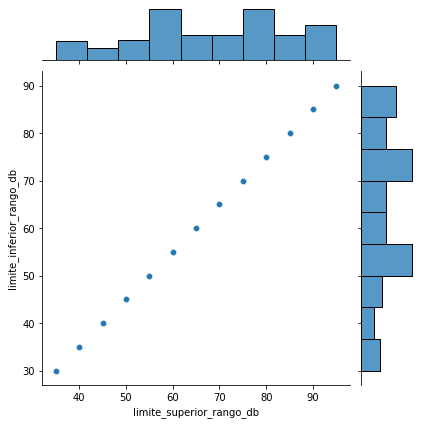

In [6]:
mapa_ruido[['limite_inferior_rango_db', 'limite_superior_rango_db']] = mapa_ruido[['limite_inferior_rango_db', 'limite_superior_rango_db']].astype(float)

rango = mapa_ruido.limite_superior_rango_db - mapa_ruido.limite_inferior_rango_db
sns.jointplot(data = mapa_ruido, 
              x = 'limite_superior_rango_db', 
              y = 'limite_inferior_rango_db')

Se ve una relacion lineal entre los limites superior e inferior. Dado que la diferencia es constante, vamos a obserbar solo el limite superior. Ahora vamos a plotear el mapa de ruido de la ciudad utilizando el limite elegido.

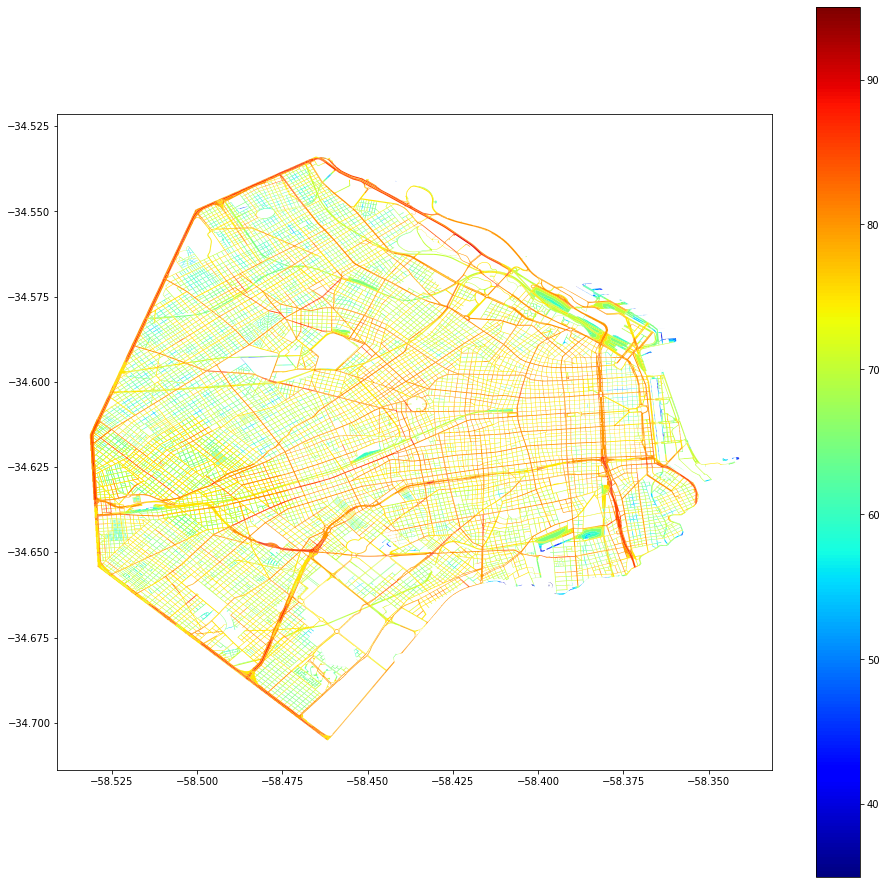

In [7]:
mapa_ruido.plot(figsize=(16,16), 
                column='limite_superior_rango_db', 
                legend=True, 
                cmap='jet')


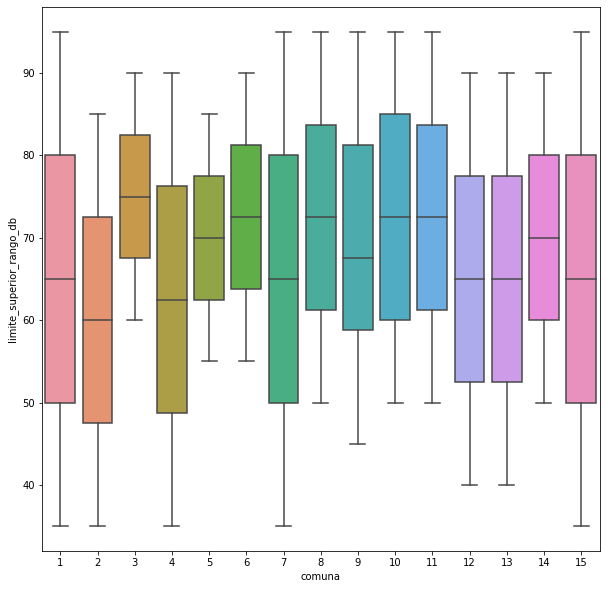

In [8]:
fig, axis = plt.subplots(figsize=(10,10))

sns.boxplot(x='comuna',
            y='limite_superior_rango_db',
            data=mapa_ruido, 
            ax=axis)


Se ve que la comuna con el percentil 50 mas alto es la 3, mientras que los limites mas bajos estan en las comunas 2 y 4.
Vamos a observar mas de cerca estos barrios.

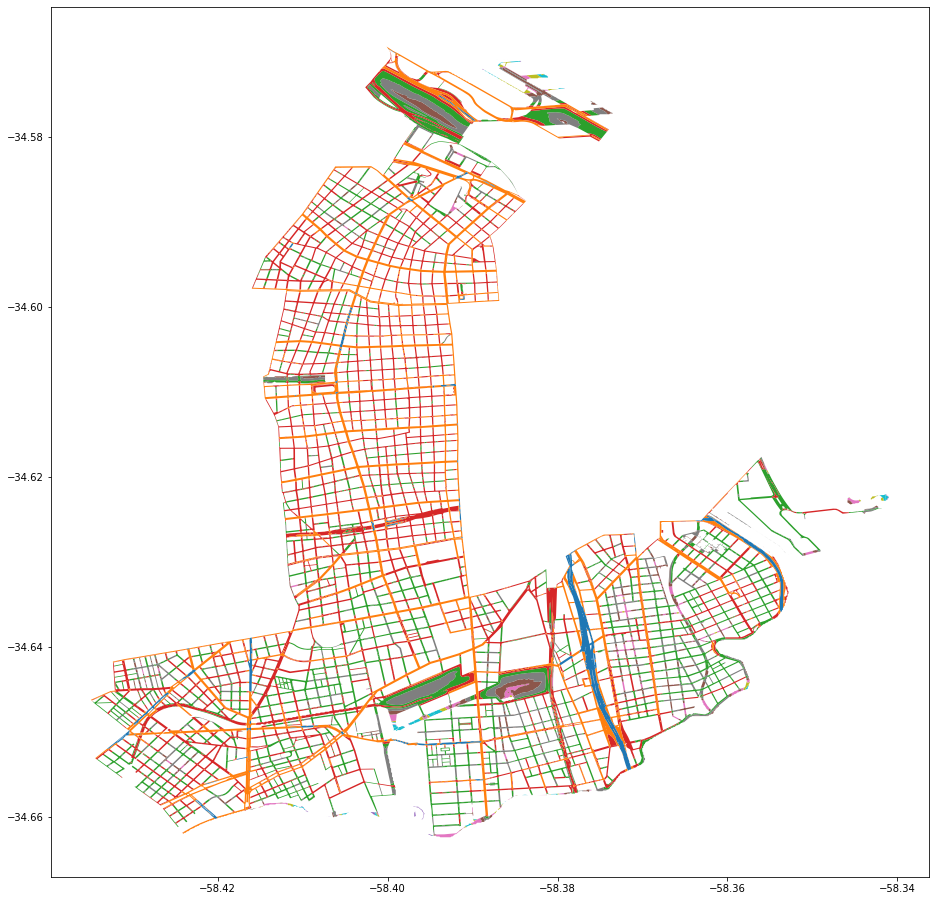

In [9]:
fix, axis = plt.subplots(figsize=(16,16))

mapa_ruido[mapa_ruido.comuna.isin(['2', '3', '4'])].plot(column='color', 
                                                         ax=axis)
